## Train-Test Split and K-Fold Cross Validation

**Train-validate-test** is a simpler approach with a single split into training and validation sets, leaving a separate test set for final model evaluation. We usually utilize the 80-20 split.

On the other hand, **k-fold cross-validation** involves partitioning a dataset into multiple subsets for training and validation, iteratively switching the validation set. We usually cut into 5 folds. 

K-fold CV involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance. **We use it not for model optimization but for model comparison.**

## Polynomial Fitting using `scikit-learn`

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

In [48]:
np.random.seed(42)
n_samples = 30

# Data generation
X = np.random.rand(n_samples, 1)
y = np.sin(2* np.pi * X).ravel() + np.random.normal(scale = 0.25, size = n_samples)
y

array([ 0.42139863, -0.21082094, -1.14376669, -0.65386869,  0.68023446,
        1.29364627,  0.35352837, -1.00963131, -0.38780239, -1.2707114 ,
        0.18119181, -0.6778552 , -1.20085653,  1.02134874,  1.09426635,
        0.95656934,  0.9135708 , -0.23019866,  0.04505946,  0.78667263,
       -0.76151066,  1.03276279,  1.05104875,  0.30366498,  0.35354988,
       -1.07194556,  0.78119063,  0.06360065, -0.29082421,  0.52055079])

In [49]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Polynomial degrees to test
degrees = [1, 3, 10]

# Scratch
polynomial = PolynomialFeatures(degree = 17) # The higher we make the degree, the more columns we add.
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.fit_transform(X_test)
    


model = LinearRegression()
model.fit(X_train_poly, y_train)

mean_squared_error(y_test, model.predict(X_test_poly))

0.218537704008955

Degree 1: Train error = 0.21860123520909852, Test error = 0.1316263269610753
Degree 3: Train error = 0.029672588394727344, Test error = 0.05046107940642455
Degree 10: Train error = 0.01818467945579551, Test error = 0.1180219941160235


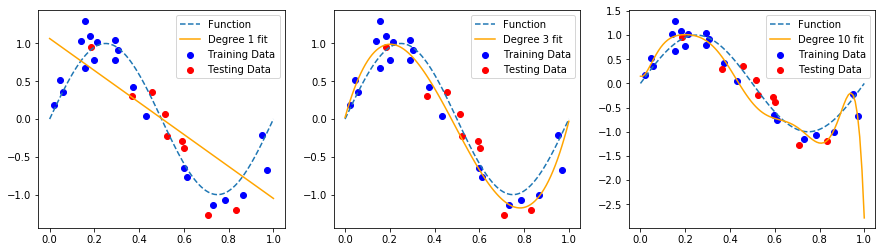

In [66]:
plt.figure(figsize = (15, 4))

# Scratch
for i, d in enumerate(degrees):
    plt.subplot(1, 3, i + 1)
    polynomial = PolynomialFeatures(degree = d) # The higher we make the degree, the more columns we add.
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.fit_transform(X_test)
    
    X_range = np.linspace(0, 1, 100).reshape(-1, 1)
    X_range_poly = polynomial.fit_transform(X_range)


    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_range_poly)

    #mean_squared_error(y_test, model.predict(X_test_poly))
    
    #Plot
    
    plt.scatter(X_train, y_train, color = "blue", label = "Training Data")
    plt.scatter(X_test, y_test, color = "red", label = "Testing Data")
    plt.plot(X_range, np.sin(2 * np.pi * X_range), "--", label = "Function")
    plt.plot(X_range, y_pred, "orange", label = f"Degree {d} fit")
    plt.legend()
    
    train_error = mean_squared_error(y_train, model.predict(X_train_poly))
    test_error = mean_squared_error(y_test, model.predict(X_test_poly))
    print(f"Degree {d}: Train error = {train_error}, Test error = {test_error}")

plt.show()

The last plot is low bias but very high variance. The models with degree 3 and 10 are overfitted. 

Plotting the training and validation accuracy and loss over time can help you detect overfitting. If the validation accuracy and loss start to diverge from the training accuracy and loss, it may be an indication of overfitting.

Among the three, if given no other choice, the best model we would pick is degree 3.

Degree 1: Train error = 0.21860123520909852, Test error = 0.1316263269610753
Degree 3: Train error = 0.029672588394727344, Test error = 0.05046107940642455
Degree 10: Train error = 0.01818467945579551, Test error = 0.1180219941160235


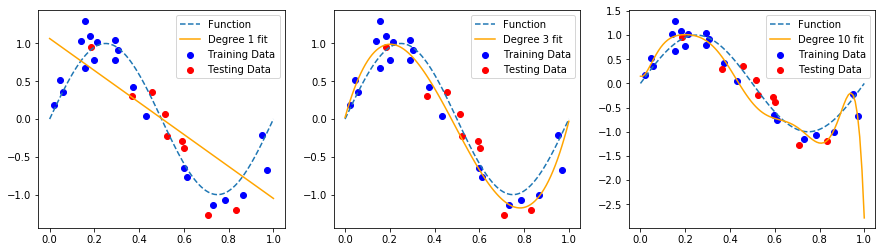

In [69]:
from sklearn.pipeline import make_pipeline

np.random.seed(42)
n_samples = 30

# Data generation
X = np.random.rand(n_samples, 1)
y = np.sin(2* np.pi * X).ravel() + np.random.normal(scale = 0.25, size = n_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

degrees = [1, 3, 10]
plt.figure(figsize = (15, 4))

# Scratch
for i, d in enumerate(degrees):
    plt.subplot(1, 3, i + 1)
    
    model = make_pipeline(PolynomialFeatures(degree = d), LinearRegression())
    model.fit(X_train, y_train)
    
    X_range = np.linspace(0, 1, 100).reshape(-1, 1)
    y_pred = model.predict(X_range)
    
    #Plot
    
    plt.scatter(X_train, y_train, color = "blue", label = "Training Data")
    plt.scatter(X_test, y_test, color = "red", label = "Testing Data")
    plt.plot(X_range, np.sin(2 * np.pi * X_range), "--", label = "Function")
    plt.plot(X_range, y_pred, "orange", label = f"Degree {d} fit")
    plt.legend()
    
    train_error = mean_squared_error(y_train, model.predict(X_train))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    print(f"Degree {d}: Train error = {train_error}, Test error = {test_error}")

plt.show()

## Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score

model = make_pipeline(PolynomialFeatures(degree = 1), LinearRegression())

scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv=5)
scores # get the average of the scores for the final score
scores.mean()

-0.2372072290564832

In [85]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i, d in enumerate(degrees):
    
    model = make_pipeline(PolynomialFeatures(degree = d), LinearRegression())
    scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv=5)
    scores # get the average of the scores for the final score
    
    print(f"Degree {d}: {scores.mean()}")

Degree 1: -0.2372072290564832
Degree 2: -0.27192006195990026
Degree 3: -0.057422846304068756
Degree 4: -0.06891656788904443
Degree 5: -0.07182071975454082
Degree 6: -0.07153015056019825
Degree 7: -0.06332602786946699
Degree 8: -0.07762532989501335
Degree 9: -1.0731124788460842
Degree 10: -0.9199154076178667


Note that in sklearn, the scores will come out as negative.

## Regularization 

Recall that our loss function is: $ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + $

Regularization is a technique used to reduce errors by fitting the function appropriately on the given training set and avoiding overfitting.

Through L1 Regularization (LASSO), we penalize the weights that are too high in order to simplify our models.

We also have L2 Regularization (Ridge) and Elastic Net.